# 导入库以及基本设置

In [41]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

plt.rcParams['font.family'] = 'SimHei'  # 直接指定字体家族
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 验证设置
print("当前字体设置:", plt.rcParams['font.family'])
print("sans-serif字体:", plt.rcParams['font.sans-serif'])

sns.set_style("whitegrid")

当前字体设置: ['SimHei']
sans-serif字体: ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']


In [4]:
df=pd.read_csv(r"C:\Users\30493\Desktop\My-Projects\superstore-date-analysis\data\Sample - Superstore.csv")

print("数据形状：",df.shape)
print("数据前5行：")
df.head()

数据形状： (9994, 21)
数据前5行：


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## 数据清洗

### 检查缺失值

In [7]:
print("缺失值检查：")
print(df.isnull().sum())

缺失值检查：
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


### 对于日期的处理

In [8]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])

# 将时间分列
df['Order Year']=df['Order Date'].dt.year
df['Order Month']=df['Order Date'].dt.month
df['Order Quarter']=df['Order Date'].dt.quarter

## 品类利润分析

In [11]:
category_profit=df.groupby('Category').agg({
    'Sales':'sum',
    'Profit':'sum'
}).round(2)
category_profit=category_profit.sort_values('Profit',ascending=False)
display(category_profit)

## 利润率
category_profit['Profit Margin']=(category_profit['Profit']/category_profit['Sales']*100).round(2)
category_profit

,Sales,Profit
Category,,
Technology,836154.03,145454.95
Office Supplies,719047.03,122490.80
Furniture,741999.80,18451.27


,Sales,Profit,Profit Margin
Category,,,
Technology,836154.03,145454.95,17.40
Office Supplies,719047.03,122490.80,17.04
Furniture,741999.80,18451.27,2.49


### 年度销售趋势

In [12]:
yearly_sales=df.groupby('Order Year').agg({
    'Sales':'sum',
    'Profit':'sum'
}).round(2)
yearly_sales

,Sales,Profit
Order Year,,
2014,484247.50,49543.97
2015,470532.51,61618.60
2016,609205.60,81795.17
2017,733215.26,93439.27


### 月销售趋势

In [64]:
monthly_sales=df.groupby(['Order Year','Order Month']).agg({
    'Sales':'sum',
    'Profit':'sum'
}).round(2)
monthly_sales

Sales    Profit
Order Year Order Month                     
2014       1             14236.90   2450.19
           2              4519.89    862.31
           3             55691.01    498.73
           4             28295.34   3488.84
           5             23648.29   2738.71
           6             34595.13   4976.52
           7             33946.39   -841.48
           8             27909.47   5318.10
           9             81777.35   8328.10
           10            31453.39   3448.26
           11            78628.72   9292.13
           12            69545.62   8983.57
2015       1             18174.08  -3281.01
           2             11951.41   2813.85
           3             38726.25   9732.10
           4             34195.21   4187.50
           5             30131.69   4667.87
           6             24797.29   3335.56
           7             28765.32   3288.65
           8             36898.33   5355.81
           9             64595.92   8209.16
           10            31404.92   2817.37
           11            75972.56  12474.79
           12            74919.52   8016.97
2016       1             18542.49   2824.82
           2             22978.82   5004.58
           3             51715.88   3611.97
           4             38750.04   2977.81
           5             56987.73   8662.15
           6             40344.53   4750.38
           7             39261.96   4432.88
           8             31115.37   2062.07
           9             73410.02   9328.66
           10            59687.74  16243.14
           11            79411.97   4011.41
           12            96999.04  17885.31
2017       1             43971.37   7140.44
           2             20301.13   1613.87
           3             58872.35  14751.89
           4             36521.54    933.29
           5             44261.11   6342.58
           6             52981.73   8223.34
           7             45264.42   6952.62
           8             63120.89   9040.96
           9             87866.65  10991.56
           10            77776.92   9275.28
           11           118447.82   9690.10
           12            83829.32   8483.35

### 客户价值分析

In [21]:
vip_customers=df.groupby('Customer Name').agg({
    'Sales':'sum',
    'Profit':'sum',
    'Order ID':'count'
}).round(2)

vip_customers=vip_customers.rename(columns={
    'Order ID':'Order Count'
}).sort_values('Profit',ascending=False)
vip_customers=vip_customers.head(10).reset_index()
vip_customers

,Customer Name,Sales,Profit,Order Count
0,Tamara Chand,19052.22,8981.32,12
1,Raymond Buch,15117.34,6976.10,18
2,Sanjit Chand,14142.33,5757.41,22
3,Hunter Lopez,12873.30,5622.43,11
4,Adrian Barton,14473.57,5444.81,20
5,Tom Ashbrook,14595.62,4703.79,10
6,Christopher Martinez,8954.02,3899.89,10
7,Keith Dawkins,8181.26,3038.63,28
8,Andy Reiter,6608.45,2884.62,9
9,Daniel Raglin,8350.87,2869.08,13


### 依据销售高低的产品排名

In [24]:
category_sales=df.groupby(['Category','Sub-Category']).agg({
    'Sales':'sum',
    'Profit':'sum'
}).round(2)
category_sales['Category Total']=category_sales.groupby('Category')['Sales'].transform('sum')
## 销售占比
category_sales['Category Ratio']=(category_sales['Sales']/category_sales['Category Total']*100).round(2)
category_sales['Rank in category']=category_sales.groupby('Category')['Sales'].rank(ascending=False,method='dense').astype(int)

print('产品子类的排名：')
category_sales.sort_values(['Category','Rank in category'])

产品子类的排名：


Sales    Profit  Category Total  \
Category        Sub-Category                                        
Furniture       Chairs        328449.10  26590.17       741999.79   
                Tables        206965.53 -17725.48       741999.79   
                Bookcases     114880.00  -3472.56       741999.79   
                Furnishings    91705.16  13059.14       741999.79   
Office Supplies Storage       223843.61  21278.83       719047.03   
                Binders       203412.73  30221.76       719047.03   
                Appliances    107532.16  18138.01       719047.03   
                Paper          78479.21  34053.57       719047.03   
                Supplies       46673.54  -1189.10       719047.03   
                Art            27118.79   6527.79       719047.03   
                Envelopes      16476.40   6964.18       719047.03   
                Labels         12486.31   5546.25       719047.03   
                Fasteners       3024.28    949.52       719047.03   
Technology      Phones        330007.05  44515.73       836154.03   
                Machines      189238.63   3384.76       836154.03   
                Accessories   167380.32  41936.64       836154.03   
                Copiers       149528.03  55617.82       836154.03   

                              Category Ratio  Rank in category  
Category        Sub-Category                                    
Furniture       Chairs                 44.27                 1  
                Tables                 27.89                 2  
                Bookcases              15.48                 3  
                Furnishings            12.36                 4  
Office Supplies Storage                31.13                 1  
                Binders                28.29                 2  
                Appliances             14.95                 3  
                Paper                  10.91                 4  
                Supplies                6.49                 5  
                Art                     3.77                 6  
                Envelopes               2.29                 7  
                Labels                  1.74                 8  
                Fasteners               0.42                 9  
Technology      Phones                 39.47                 1  
                Machines               22.63                 2  
                Accessories            20.02                 3  
                Copiers                17.88                 4

## 数据可视化

#### 1. 品类利润可视化

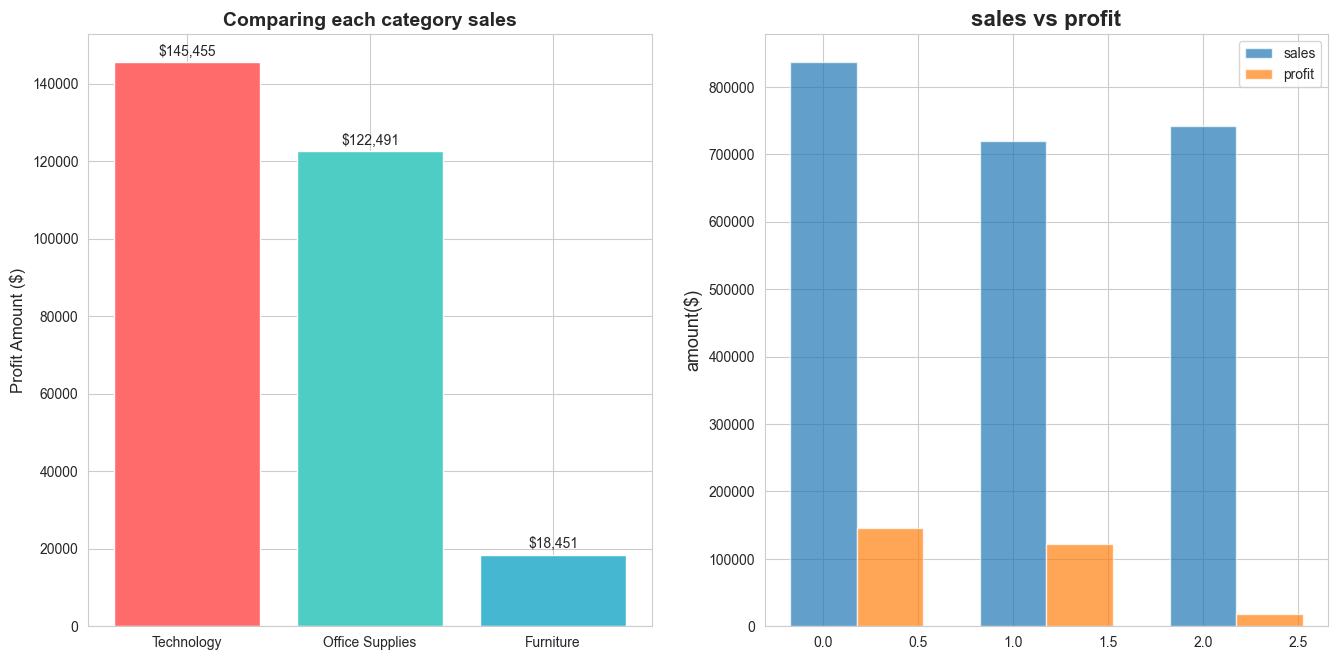

In [84]:
fig,(ax1,ax2)=plt.subplots(1, 2,figsize=(16,8))
categories=category_profit.index
profits= category_profit['Profit']

bars=ax1.bar(categories,profits,color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax1.set_title('Comparing each category sales',fontsize=14,fontweight='bold')
ax1.set_ylabel('Profit Amount ($)',fontsize=12)

for bar,profit in zip(bars,profits):
    height=bar.get_height()
    ax1.text(bar.get_x()+bar.get_width()/2,height+1000,
            f'${profit:,.0f}',ha='center',va='bottom')
width = 0.35
x=range(len(categories))
ax2.bar(x,category_profit['Sales'],width,label='sales',alpha=0.7)
ax2.bar([i+width for i in x],category_profit['Profit'],width,label='profit',alpha=0.7)
ax2.set_title('sales vs profit',fontsize=16,fontweight='bold')
ax2.set_ylabel('amount($)',fontsize=13)
ax2.legend()
plt.subplots_adjust(top=0.85)
plt.savefig(r'C:\Users\30493\Desktop\My-Projects\superstore-date-analysis\python\category_analysis.png',dpi=300,bbox_inches='tight')
plt.show()  # 显示图形

### 2. 销售趋势可视化

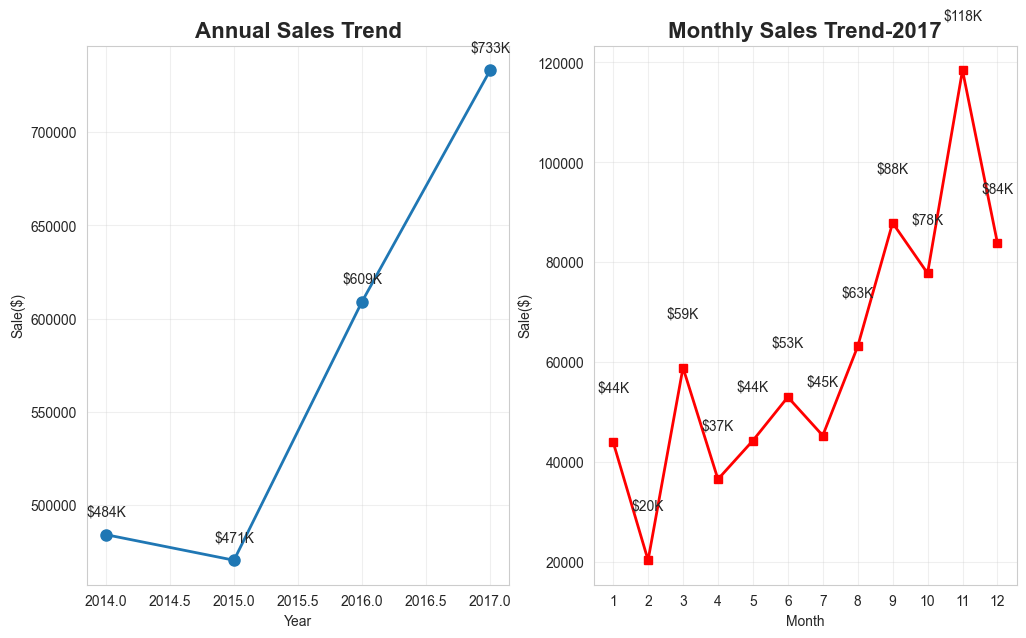

In [85]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.plot(yearly_sales.index,yearly_sales['Sales'],marker='o',linewidth=2,markersize=8)
plt.title('Annual Sales Trend',fontsize=16,fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Sale($)')
plt.grid(True,alpha=0.3)
for year,sales in zip(yearly_sales.index,yearly_sales['Sales']):
    plt.text(year,sales+10000,f'${sales/1000:.0f}K',ha='center')
plt.subplot(1,2,2)
monthly_2017=monthly_sales.loc[2017]
plt.plot(monthly_2017.index,monthly_2017['Sales'],marker='s',color='red',linewidth=2)
plt.title('Monthly Sales Trend-2017',fontsize=16,fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Sale($)')
plt.grid(True,alpha=0.3)
plt.xticks(range(1,13))
for month,sales in zip(monthly_2017.index,monthly_2017['Sales']):
    plt.text(month,sales+10000,f'${sales/1000:.0f}K',ha='center')
plt.savefig(r'C:\Users\30493\Desktop\My-Projects\superstore-date-analysis\python\sales_trend.png',dpi=200,bbox_inches='tight')
plt.show()

### 3.客户价值分析

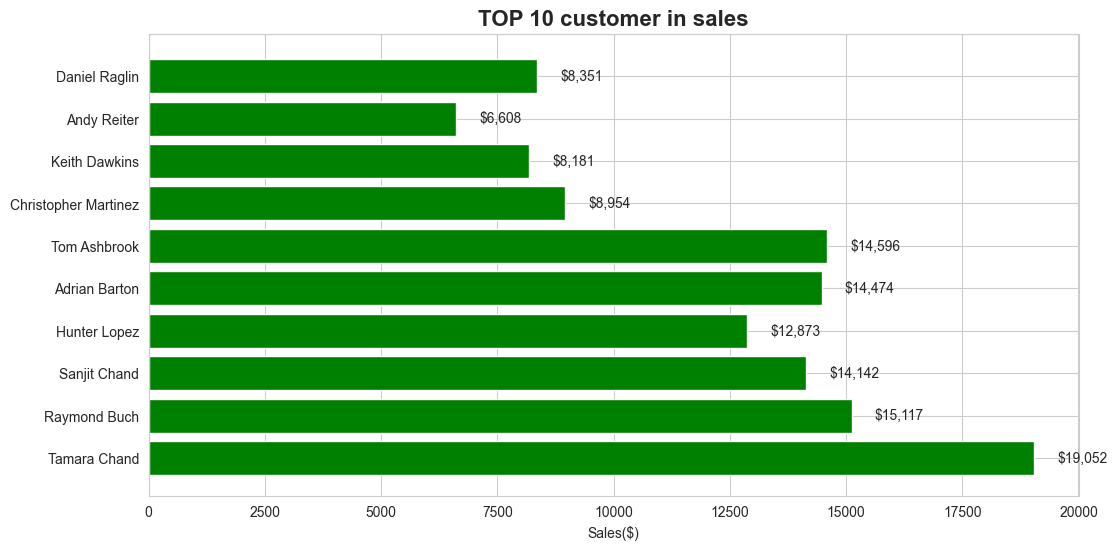

In [86]:
top_customers=vip_customers.head(10)
plt.figure(figsize=(12,6))
bars=plt.barh(top_customers['Customer Name'],top_customers['Sales'],color='green')
plt.title('TOP 10 customer in sales',fontsize=16,fontweight='bold')
plt.xlabel('Sales($)')
plt.yticks(range(0,11))
for bar,sales in zip(bars,top_customers['Sales']):
    plt.text(bar.get_width()+500,bar.get_y()+bar.get_height()/2,
            f'${sales:,.0f}',va='center',fontsize=10)
plt.savefig(r'C:\Users\30493\Desktop\My-Projects\superstore-date-analysis\python\top_customers.png',dpi=200,bbox_inches='tight')
plt.show()